In [37]:
import os
import random

import pandas as pd
import numpy as np

import pydicom as pyd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
INPUT_PATH = 'E:/ICT/Dataset/rsna-intracranial-hemorrhage-detection/'

In [9]:
os.listdir(INPUT_PATH)

['stage_2_sample_submission.csv',
 'stage_2_test',
 'stage_2_train',
 'stage_2_train.csv']

In [12]:
train_df = pd.read_csv(INPUT_PATH+"stage_2_train.csv")
train_df.head(5)

,ID,Label
0,ID_12cadc6af_epidural,0
1,ID_12cadc6af_intraparenchymal,0
2,ID_12cadc6af_intraventricular,0
3,ID_12cadc6af_subarachnoid,0
4,ID_12cadc6af_subdural,0


In [13]:
train_df.head(10)
labels = train_df['Label']

In [11]:
train_df = train_df.ID.str.rsplit("_",n=1, expand = True)

In [12]:
train_df.head(5)

,0,1
0,ID_12cadc6af,epidural
1,ID_12cadc6af,intraparenchymal
2,ID_12cadc6af,intraventricular
3,ID_12cadc6af,subarachnoid
4,ID_12cadc6af,subdural


In [13]:
train_df['label'] = labels

In [14]:
train_df.head(5)

,0,1,label
0,ID_12cadc6af,epidural,0
1,ID_12cadc6af,intraparenchymal,0
2,ID_12cadc6af,intraventricular,0
3,ID_12cadc6af,subarachnoid,0
4,ID_12cadc6af,subdural,0


In [15]:
train_df = train_df.rename({0 : "image",1 : "subtype"}, axis=1)

In [16]:
train_df.head(5)

,image,subtype,label
0,ID_12cadc6af,epidural,0
1,ID_12cadc6af,intraparenchymal,0
2,ID_12cadc6af,intraventricular,0
3,ID_12cadc6af,subarachnoid,0
4,ID_12cadc6af,subdural,0


In [17]:
#Countts of targets for each subtype
subtype_count = train_df.groupby("subtype").label.value_counts().unstack()
subtype_count

label,0,1
subtype,,
any,644874,107933
epidural,749662,3145
intraparenchymal,716689,36118
intraventricular,726602,26205
subarachnoid,717132,35675
subdural,705641,47166


In [18]:
#The % target distribution across each subtype
subtype_count_per =  subtype_count.loc[:,1]/train_df.groupby("subtype").size() *100

multi_target_count = train_df.groupby("image").label.sum()

In [19]:
def random_colors(num_colors : int):
    colors = []
    for i in range(num_colors):
        colors.append('#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors 

C:\Users\sctha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sctha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Imbalance in target distrubution')

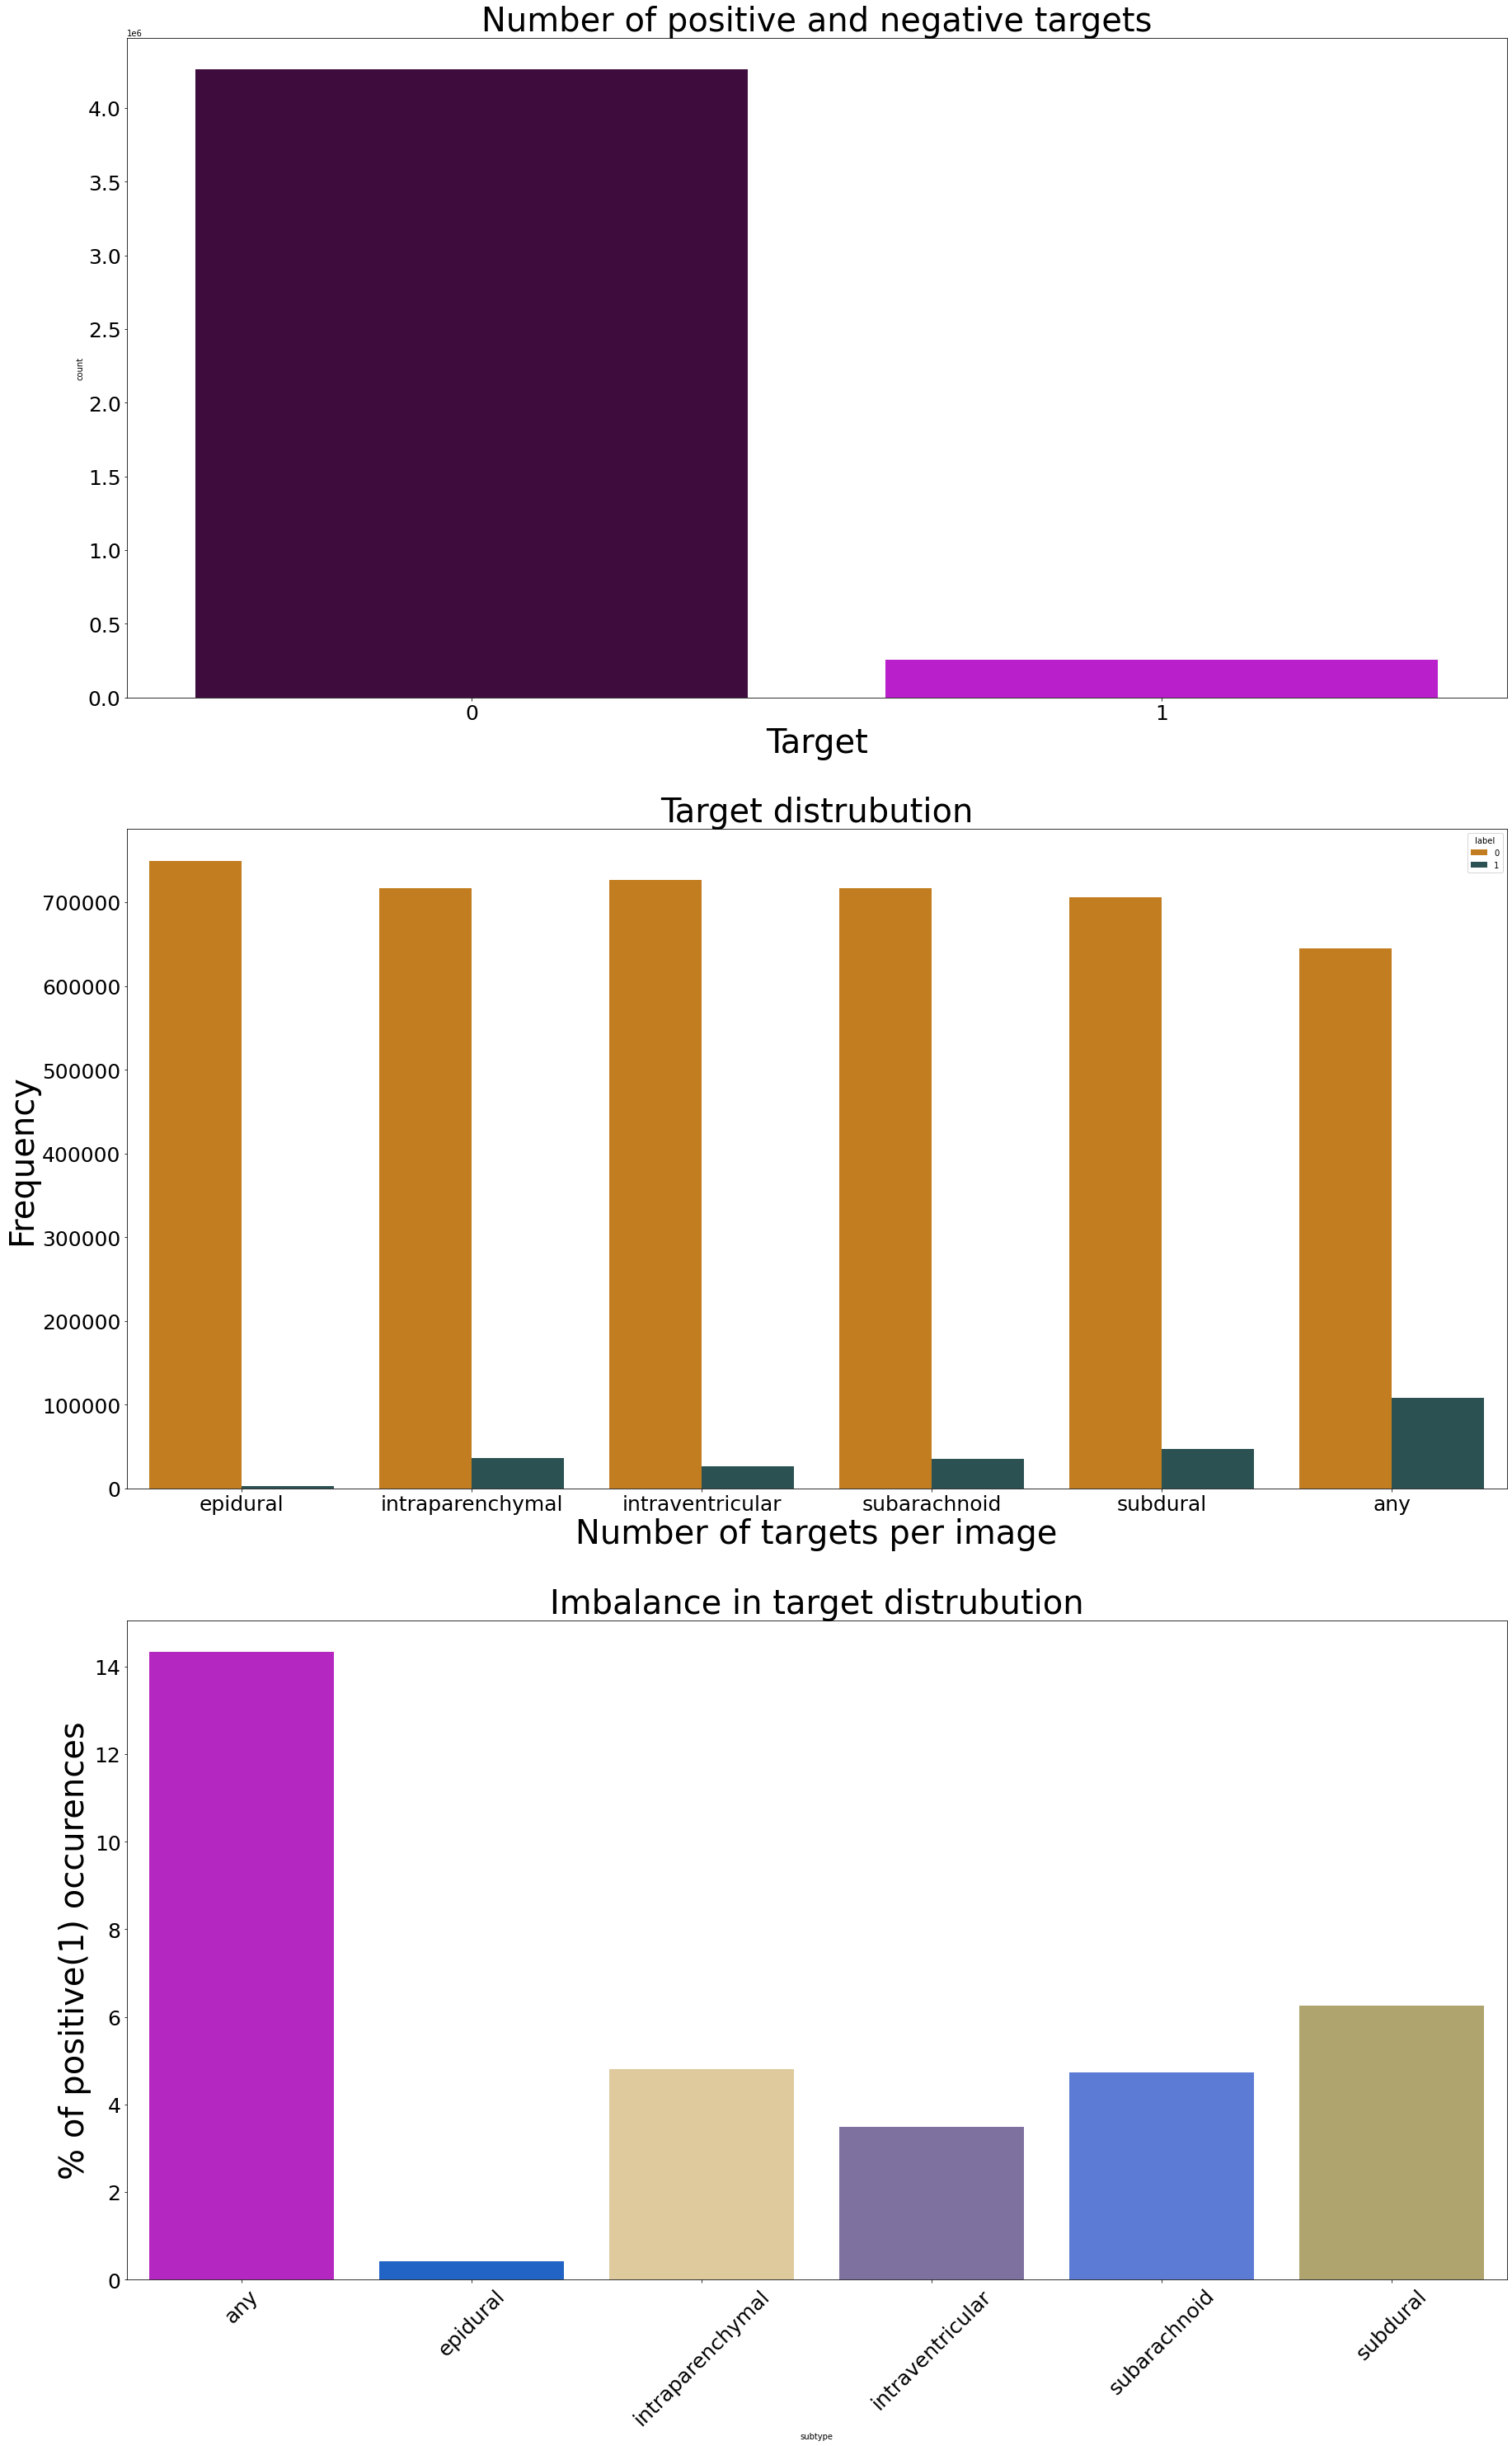

In [67]:
fig, ax = plt.subplots(3,1, figsize=(30,50))

sns.countplot(train_df.label,ax=ax[0], palette=random_colors(2))
ax[0].set_xlabel("Target Variable", fontsize=40)
ax[0].set_ylabel("Count", fontsize=40)
ax[0].tick_params(axis='x', labelsize=25 ) 
ax[0].tick_params(axis='y', labelsize=25 ) 
ax[0].set_title("Distribution of Target",fontsize=40)


sns.countplot(x="subtype", hue="label", data=train_df, ax=ax[1], palette=random_colors(6))
ax[1].set_xlabel("Number of targets per image",fontsize=40)
ax[1].set_ylabel("Frequency",fontsize=40)
ax[1].tick_params(axis='x', labelsize=25 ) 
ax[1].tick_params(axis='y', labelsize=25 ) 
ax[1].set_title("Target distrubution",fontsize=40)

sns.barplot(subtype_count_per.index, subtype_count_per.values, ax=ax[2], palette=random_colors(6))
plt.xticks(rotation=45)
ax[2].set_ylabel("% of positive(1) occurences",fontsize=40)
ax[2].tick_params(axis='x', labelsize=25 ) 
ax[2].tick_params(axis='y', labelsize=25 ) 
ax[2].set_title("Imbalance in target distrubution",fontsize=40)



In [20]:
train_files = os.listdir(INPUT_PATH+"stage_2_train")
len(train_files)

371832

In [19]:
test_files = os.listdir(INPUT_PATH+"stage_2_test")
len(test_files)

121232

In [24]:
len(train_files)/len(test_files)
#Approx train = 3 * test, so we can say that the ratio of train to test image is 3:1, 75% to 25%

3.067110993797017

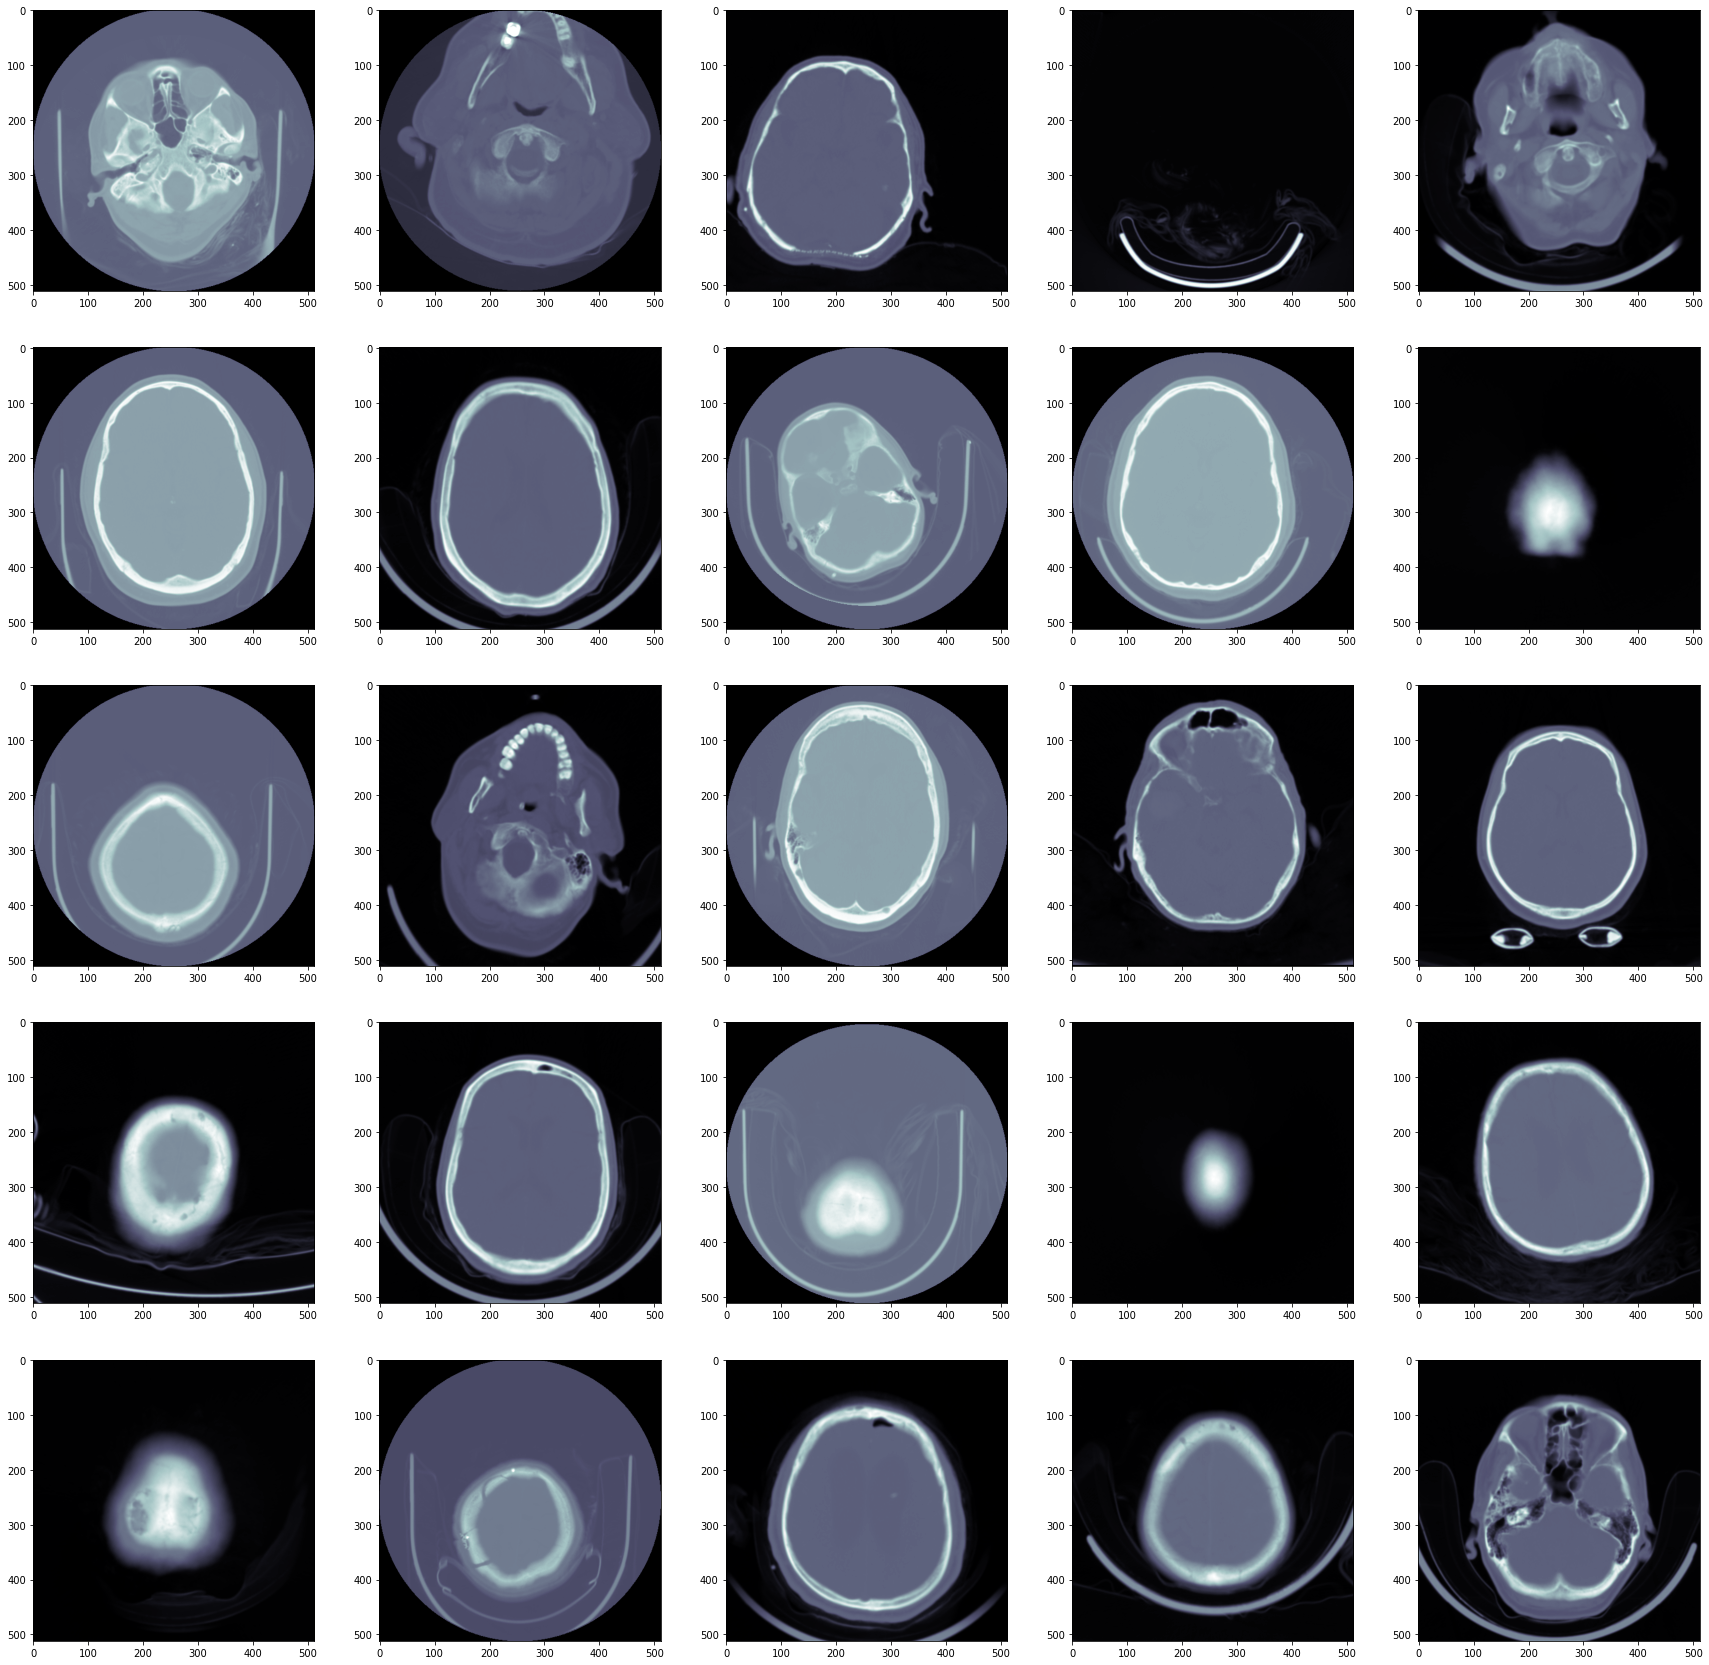

In [49]:
fig = plt.figure(figsize = (30,30))
column = 5; row = 5
for i in range(1,column*row + 1):
    dcm = pyd.dcmread(INPUT_PATH+"stage_2_train/"+train_files[i])
    fig.add_subplot(row, column, i)
    plt.imshow(dcm.pixel_array,cmap = plt.cm.bone)


